In [12]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
device = 'cuda' if torch.cuda.is_available() else 'cpu'



epoch = 10
batch_size = 64

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


loader_train = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


loader_test = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)




In [2]:


from torch import nn, optim
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1,8,3,stride=1)
        self.act1 = nn.ReLU()
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(8,16,3,padding=1)
        self.act2 = nn.ReLU()
        self.Maxpool2 = nn.MaxPool2d(2)
        self.fc = nn.Linear(16*6*6,10)

    def forward(self,x):
        x = self.conv1(x)     
        x = self.act1(x)
        x = self.Maxpool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.Maxpool2(x)

        x = torch.flatten(x,start_dim=1)
        x = self.fc(x)
        return x
    


cuda


In [3]:

   
model = CNN().to(DEVICE)


model_optimizer = torch.optim.Adam(model.parameters())
model_loss = nn.CrossEntropyLoss()
    

from tqdm import tqdm

def train(model, train_data, epoch, model_optimizer, model_loss):
    loss_history = []
    model.train()
    
    for ep in range(epoch):
        run_loss = 0
        for x_batch, y_batch in tqdm(train_data):
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            outputs = model(x_batch)
            loss = model_loss(outputs, y_batch)
            model_optimizer.zero_grad()
            loss.backward()
            model_optimizer.step()
            run_loss += loss.item()*x_batch.shape[0]
        loss_e = (run_loss/len(train_data.dataset))
        loss_history.append(loss_e)
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*50)
        print("\n")
        
    return loss_history

In [4]:
model = CNN().to(DEVICE)


model_optimizer = torch.optim.Adam(model.parameters())
model_loss = nn.CrossEntropyLoss()



In [5]:

loss_history = train(model = model, 
                     train_data = loader_train,
                     epoch = epoch,
                     model_optimizer = model_optimizer, 
                     model_loss = model_loss)





100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:16<00:00, 57.87it/s]


Epoch: 1, train loss: 0.363
--------------------------------------------------




100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:10<00:00, 92.39it/s]


Epoch: 2, train loss: 0.101
--------------------------------------------------




100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:10<00:00, 89.74it/s]


Epoch: 3, train loss: 0.076
--------------------------------------------------




100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:10<00:00, 86.79it/s]


Epoch: 4, train loss: 0.063
--------------------------------------------------




100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:10<00:00, 88.78it/s]


Epoch: 5, train loss: 0.056
--------------------------------------------------




100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:09<00:00, 99.55it/s]


Epoch: 6, train loss: 0.051
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 937/937 [00:09<00:00, 100.10it/s]


Epoch: 7, train loss: 0.045
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 937/937 [00:09<00:00, 100.93it/s]


Epoch: 8, train loss: 0.042
--------------------------------------------------




100%|███████████████████████████████████████████████████████████████████████████████| 937/937 [00:09<00:00, 102.44it/s]


Epoch: 9, train loss: 0.038
--------------------------------------------------




100%|████████████████████████████████████████████████████████████████████████████████| 937/937 [00:09<00:00, 95.70it/s]

Epoch: 10, train loss: 0.037
--------------------------------------------------




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


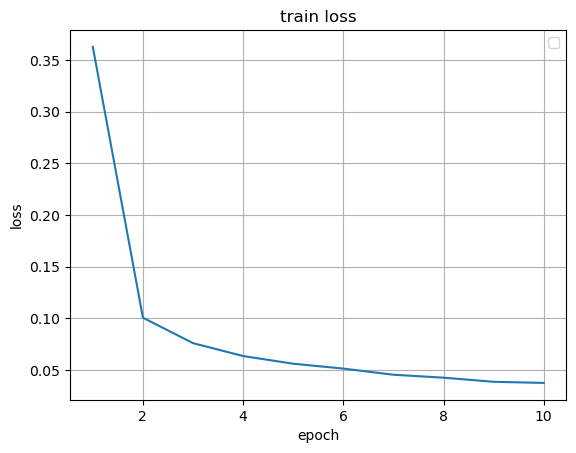

In [6]:
import matplotlib.pyplot as plt
plt.title('train loss')
plt.plot(range(1,epoch+1), loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

 

In [7]:
def Test(model,test_data):
    NoTes = len(test_data.dataset)
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_data:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            outputs = model(x_batch)
            # accuracy
            pred = outputs.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        test_acc = rcorrect/NoTes * 100
    print(f"Test accuracy: {rcorrect}/{NoTes} ({round(test_acc,1)} %)")

    
def count_params(model):
    num=0
    for param in model.parameters():
        if param.requires_grad:
            num+=param.numel()
    print(num)    
    

In [13]:
Test(model, loader_test)
count_params(model)    
    

Test accuracy: 9831/10000 (98.3 %)
7018
